In [111]:
import numpy as np
def F(x,y):
    #return y*np.sin(x)*np.exp(-x)+x*np.log(y)*np.cos(y)
    return (x-5)**2+.1*(x-5)*(y-7)+(y-7)**2-100

In [112]:
x = np.linspace(0,10,1000)
dx = x[1]-x[0]
y = np.sin(x) + 1
dydx = np.gradient(y, dx)

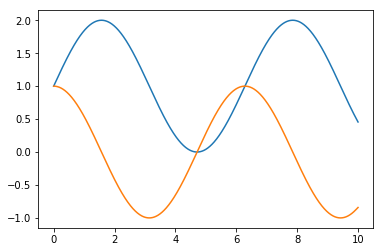

In [113]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.plot(x,y)
plt.plot(x,dydx)

In [114]:
xg=np.linspace(1,10,100)
dx=xg[1]-xg[0]
yg=np.linspace(1,10,100)
dy=yg[1]-yg[0]
xm,ym=np.meshgrid(xg,yg)
z=F(xm,ym)
dz=np.gradient(z, dx, dy)

In [115]:
z

array([[-45.6       , -46.37355372, -47.13057851, ..., -43.67603306,
        -42.84628099, -42.        ],
       [-46.71900826, -47.49173554, -48.24793388, ..., -44.71487603,
        -43.88429752, -43.03719008],
       [-47.8214876 , -48.59338843, -49.34876033, ..., -45.73719008,
        -44.90578512, -44.05785124],
       ..., 
       [-77.18512397, -77.8785124 , -78.5553719 , ..., -67.48512397,
        -66.57520661, -65.64876033],
       [-76.70082645, -77.39338843, -78.06942149, ..., -66.92066116,
        -66.00991736, -65.08264463],
       [-76.2       , -76.89173554, -77.56694215, ..., -66.33966942,
        -65.42809917, -64.5       ]])

In [116]:
dz

[array([[-12.30909091, -12.3       , -12.29090909, ..., -11.42727273,
         -11.41818182, -11.40909091],
        [-12.21818182, -12.20909091, -12.2       , ..., -11.33636364,
         -11.32727273, -11.31818182],
        [-12.03636364, -12.02727273, -12.01818182, ..., -11.15454545,
         -11.14545455, -11.13636364],
        ..., 
        [  5.23636364,   5.24545455,   5.25454545, ...,   6.11818182,
           6.12727273,   6.13636364],
        [  5.41818182,   5.42727273,   5.43636364, ...,   6.3       ,
           6.30909091,   6.31818182],
        [  5.50909091,   5.51818182,   5.52727273, ...,   6.39090909,
           6.4       ,   6.40909091]]),
 array([[ -8.50909091,  -8.41818182,  -8.23636364, ...,   9.03636364,
           9.21818182,   9.30909091],
        [ -8.5       ,  -8.40909091,  -8.22727273, ...,   9.04545455,
           9.22727273,   9.31818182],
        [ -8.49090909,  -8.4       ,  -8.21818182, ...,   9.05454545,
           9.23636364,   9.32727273],
        ...,

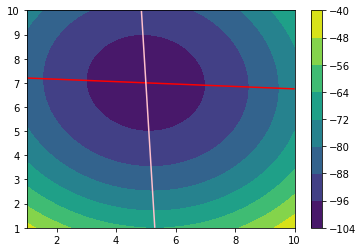

In [117]:
plt.contourf(xm,ym,z)
plt.colorbar()
plt.contour(xm,ym,dz[0],levels=[0],colors='r')
plt.contour(xm,ym,dz[1],levels=[0],colors='pink')

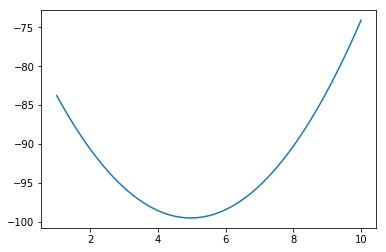

In [118]:
plt.plot(xg,z[74,:])

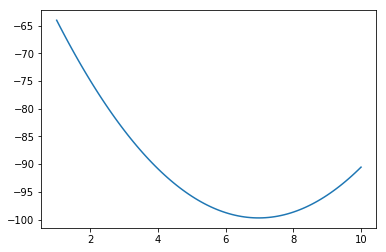

In [119]:
plt.plot(yg,z[:,50])

In [120]:
from scipy.optimize import approx_fprime

In [130]:
>>> def func(x, c0, c1):
...     "Coordinate vector `x` should be an array of size two."
...     return c0 * x[0]**2 + c1*x[1]**2

>>> x = np.ones(2)
>>> c0, c1 = (1, 200)
>>> eps = 1e-8 #np.sqrt(np.finfo(float).eps)
>>> approx_fprime(x, func, [eps, eps], c0, c1)


array([   1.99999874,  399.99999899])

In [139]:
Fv = lambda v: F(v[0],v[1])

In [141]:
dz2=np.zeros([100,100,2])
for i in range(100):
    for j in range(100):
        v=np.asarray([xg[i],yg[j]])
        dz2[i,j,:]=approx_fprime(v, Fv, [eps, eps])

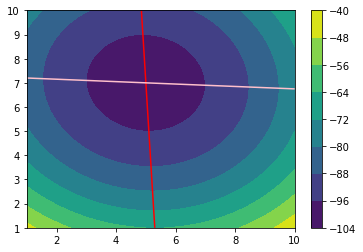

In [147]:
plt.contourf(xm,ym,z)
plt.colorbar()
plt.contour(ym,xm,dz2[:,:,0],levels=[0],colors='r')
plt.contour(ym,xm,dz2[:,:,1],levels=[0],colors='pink')